In [2]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
beer_df = pd.read_csv("Resources/clean_beer_data_try2.csv")
beer_df.head()

,index,beer_name,brewery_name,beer_style,country,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_review_count,brewery_review,brewery_review_count,lat,lng,beer_id,brewery_id
0,0,(512) IPA,(512) Brewing Company,American IPA,United States,7.0,4.259259,4.129630,4.009259,4.101852,4.185185,54,4.22,135,30.222972,-97.770152,43535,17863
1,1,(512) Pecan Porter,(512) Brewing Company,American Porter,United States,6.8,4.185185,4.067901,4.166667,3.981481,4.166667,81,4.22,135,30.222972,-97.770152,45617,17863
2,2,Hell Or High Watermelon Wheat Beer,21st Amendment Brewery,Fruit / Vegetable Beer,United States,4.9,3.388771,3.116525,3.237288,3.325212,3.237288,472,3.71,2767,37.782525,-122.392460,4202,735
3,3,21st Amendment IPA,21st Amendment Brewery,American IPA,United States,7.0,3.890769,3.801538,3.977692,3.771538,3.767692,650,3.71,2767,37.782525,-122.392460,20781,735
4,4,Bitter American,21st Amendment Brewery,American Pale Ale (APA),United States,4.4,4.118421,3.921053,3.927632,3.769737,3.898026,152,3.71,2767,37.782525,-122.392460,34791,735


In [5]:
#Find top 5 most common beer styles
style_count=beer_df["beer_style"].value_counts()
print(beer_df["beer_style"].unique())

['American IPA' 'American Porter' 'Fruit / Vegetable Beer'
 'American Pale Ale (APA)' 'American Double / Imperial IPA'
 'American Black Ale' 'Belgian Strong Dark Ale' 'Winter Warmer'
 'English Strong Ale' 'American Adjunct Lager' 'Tripel' 'Belgian Dark Ale'
 'Belgian Pale Ale' 'Belgian Strong Pale Ale' 'Vienna Lager'
 'English Brown Ale' 'American Pale Lager' 'Maibock / Helles Bock'
 'American Amber / Red Ale' 'Märzen / Oktoberfest' 'Light Lager'
 'Czech Pilsener' 'American Brown Ale' 'Dubbel' 'Witbier'
 'German Pilsener' 'American Strong Ale' 'Doppelbock'
 'Foreign / Export Stout' 'Oatmeal Stout'
 'Extra Special / Strong Bitter (ESB)' 'Altbier' 'American Blonde Ale'
 'Old Ale' 'Kölsch' 'American Barleywine' 'Baltic Porter'
 'Russian Imperial Stout' 'Euro Pale Lager' 'English Porter' 'Belgian IPA'
 'American Double / Imperial Stout' 'Scotch Ale / Wee Heavy'
 'English Barleywine' 'Weizenbock' 'English India Pale Ale (IPA)'
 'Quadrupel (Quad)' 'American Wild Ale' 'Saison / Farmhouse Ale'

In [5]:
IPA_df=beer_df.loc[(beer_df["beer_style"]=="American IPA"),["beer_style","review_overall"]]
DoubIPA_df=beer_df.loc[(beer_df["beer_style"]=="American Double / Imperial IPA"),["beer_style","review_overall"]]
APA_df=beer_df.loc[(beer_df["beer_style"]=="American Pale Ale (APA)"),["beer_style","review_overall"]]
Port_df=beer_df.loc[(beer_df["beer_style"]=="American Porter"),["beer_style","review_overall"]]
ImpSt_df=beer_df.loc[(beer_df["beer_style"]=="American Double / Imperial Stout"),["beer_style","review_overall"]]
common_beer_df=IPA_df
common_beer_df=common_beer_df.append([DoubIPA_df,APA_df,Port_df,ImpSt_df])
common_beer_df

,beer_style,review_overall
0,American IPA,4.259259
3,American IPA,3.890769
30,American IPA,3.600216
45,American IPA,3.767273
58,American IPA,3.890625
...,...,...
4160,American Double / Imperial Stout,3.863636
4161,American Double / Imperial Stout,4.131988
4212,American Double / Imperial Stout,3.767782
4219,American Double / Imperial Stout,3.702222


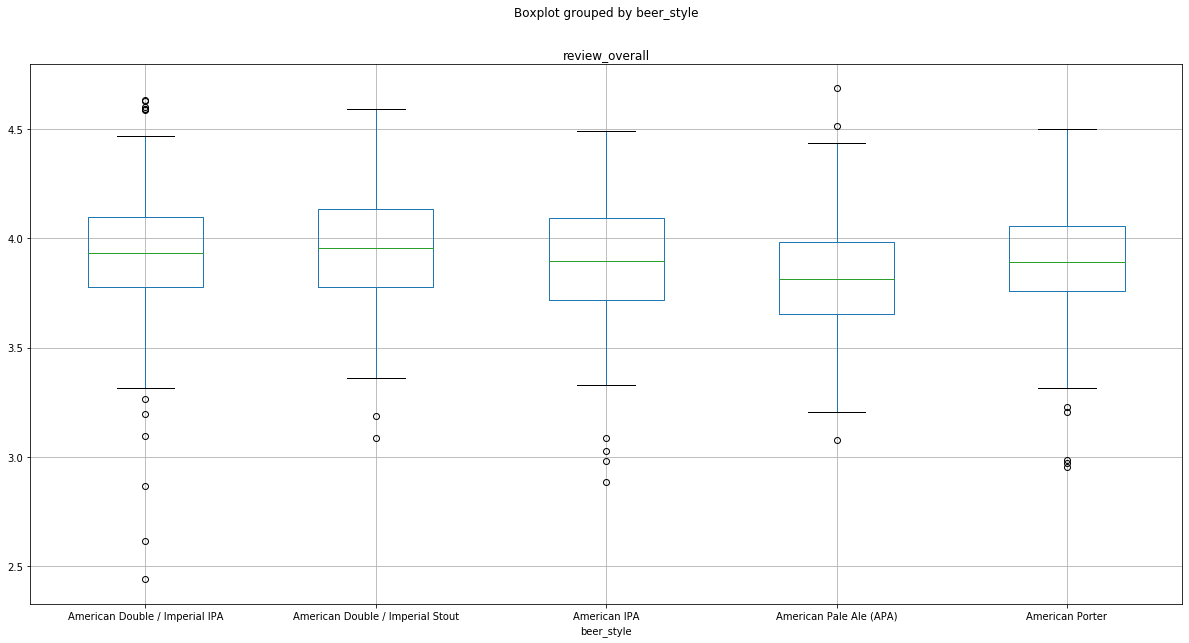

In [5]:
common_beer_df.boxplot("review_overall", by="beer_style",figsize=(20,10))
plt.savefig(f"Images/BeerBox.png")

In [6]:
stats.f_oneway(IPA_df["review_overall"],DoubIPA_df["review_overall"],APA_df["review_overall"],Port_df["review_overall"],ImpSt_df["review_overall"])

F_onewayResult(statistic=5.64910501617791, pvalue=0.00017036007480652904)

In [9]:
#Beer types
#PaleAles: American Amber Ale, AMerican Pale Ale, Blonde Ale, 
#English Bitter, english pale ale

PaleAles_df=beer_df.loc[((beer_df["beer_style"]=="American Pale Ale (APA)")
                        | (beer_df["beer_style"]=="American Amber Ale")
                        | (beer_df["beer_style"]=="American Blonde Ale")
                        | (beer_df["beer_style"]=="English Bitter")
                        |( beer_df["beer_style"]=="English Pale Ale")),["beer_style","review_overall"]]
PaleAles_df

,beer_style,review_overall
4,American Pale Ale (APA),4.118421
31,American Pale Ale (APA),3.574176
41,American Blonde Ale,3.858333
53,American Pale Ale (APA),3.991228
61,American Pale Ale (APA),4.138596
...,...,...
4250,American Pale Ale (APA),3.700000
4260,English Pale Ale,3.272727
4269,American Pale Ale (APA),3.854244
4276,American Pale Ale (APA),3.623077


In [21]:
#DarkLagers: American Amber Lage, German Dunkel, German Marzan/Oktoberfest
#German Schwarzbier,Viena Lager
DarkLagers_df=beer_df.loc[((beer_df["beer_style"]=="Munich Dunkel Lager")
                        | (beer_df["beer_style"]=="Märzen / Oktoberfest")
                        | (beer_df["beer_style"]=="Euro Dark Lager")
                        | (beer_df["beer_style"]=="Schwarzbier")),["beer_style","review_overall"]]
DarkLagers_df

,beer_style,review_overall
24,Märzen / Oktoberfest,3.265432
180,Märzen / Oktoberfest,3.224891
258,Munich Dunkel Lager,3.396825
260,Märzen / Oktoberfest,3.280702
267,Märzen / Oktoberfest,3.784314
...,...,...
4046,Märzen / Oktoberfest,3.500000
4052,Märzen / Oktoberfest,3.830189
4138,Märzen / Oktoberfest,3.957464
4179,Munich Dunkel Lager,3.627350


In [11]:
#Brown Ales: American Brown Ale, English Brown Ale, English Mild
BrownAles_df=beer_df.loc[((beer_df["beer_style"]=="American Brown Ale")
                        | (beer_df["beer_style"]=="English Brown Ale")
                        | (beer_df["beer_style"]=="English Dark Mild Ale")),["beer_style","review_overall"]]
BrownAles_df

,beer_style,review_overall
18,English Brown Ale,3.706956
29,American Brown Ale,3.431677
55,American Brown Ale,3.781250
68,English Brown Ale,4.149351
84,American Brown Ale,3.284314
...,...,...
4184,English Brown Ale,3.828767
4252,American Brown Ale,3.746154
4261,English Brown Ale,3.743363
4273,English Dark Mild Ale,3.891960


In [13]:
#India Pale Ales: American IPA, English IPA, Imperial IPA, New England IPA
IPA_df=beer_df.loc[((beer_df["beer_style"]=="American IPA")
                        | (beer_df["beer_style"]=="English India Pale Ale (IPA)")
                        | (beer_df["beer_style"]=="American Double / Imperial IPA")
                        | (beer_df["beer_style"]=="Belgian IPA")),["beer_style","review_overall"]]
IPA_df

,beer_style,review_overall
0,American IPA,4.259259
3,American IPA,3.890769
5,American Double / Imperial IPA,3.932526
30,American IPA,3.600216
45,American IPA,3.767273
...,...,...
4240,American Double / Imperial IPA,3.811258
4243,American Double / Imperial IPA,3.872222
4253,American IPA,3.641892
4266,English India Pale Ale (IPA),3.846690


In [14]:
#Wheat Beer:American Wheat Wine Ale, American Wheat, Belgian Witbier, 
#Berliner Weisse, German Dunkelweizern, Hefeweizen
WheatBeer_df=beer_df.loc[((beer_df["beer_style"]=="American Pale Wheat Ale")
                        | (beer_df["beer_style"]=="Wheatwine")
                        | (beer_df["beer_style"]=="American Dark Wheat Ale")),["beer_style","review_overall"]]
WheatBeer_df

,beer_style,review_overall
138,American Pale Wheat Ale,3.604762
160,American Pale Wheat Ale,3.444444
215,American Pale Wheat Ale,3.224057
219,American Pale Wheat Ale,2.830882
223,American Pale Wheat Ale,3.544944
...,...,...
4041,Wheatwine,3.710526
4173,American Pale Wheat Ale,3.500000
4177,American Pale Wheat Ale,3.452941
4217,Wheatwine,3.609290


In [15]:
#Porter: Imperial Porter, Baltic Porter, Brown Porter,
#Robust Porter, Smoke Porter
Porter_df=beer_df.loc[((beer_df["beer_style"]=="American Porter")
                        | (beer_df["beer_style"]=="Baltic Porter")
                        | (beer_df["beer_style"]=="English Porter")),["beer_style","review_overall"]]
Porter_df

,beer_style,review_overall
1,American Porter,4.185185
43,American Porter,4.121305
47,Baltic Porter,4.048485
51,Baltic Porter,3.695652
56,English Porter,3.827273
...,...,...
4251,American Porter,3.854839
4256,American Porter,4.091398
4270,English Porter,3.801932
4277,American Porter,4.130597


In [16]:
#Stouts:Imperial Stout, AMerican Stout, English Otmeal Stout,
#Sweet/Milk Stout, Dry Stout
Stouts_df=beer_df.loc[((beer_df["beer_style"]=="Foreign / Export Stout")
                        | (beer_df["beer_style"]=="Oatmeal Stout")
                        | (beer_df["beer_style"]=="American Double / Imperial Stout")
                        | (beer_df["beer_style"]=="American Stout")
                        | (beer_df["beer_style"]=="Irish Dry Stout")
                        | (beer_df["beer_style"]=="English Stout")
                        | (beer_df["beer_style"]=="Milk / Sweet Stout")
                        | (beer_df["beer_style"]=="Russian Imperial Stout")),["beer_style","review_overall"]]
Stouts_df

,beer_style,review_overall
37,Foreign / Export Stout,4.014493
38,Oatmeal Stout,3.902857
50,Russian Imperial Stout,3.727273
64,American Double / Imperial Stout,4.284392
74,American Double / Imperial Stout,4.354460
...,...,...
4268,English Stout,3.809028
4278,Oatmeal Stout,3.609375
4287,American Stout,3.870370
4288,Russian Imperial Stout,3.911504


In [17]:
#Bocks:Bock, DIppelbock,Maibock,weizenbock
Bocks_df=beer_df.loc[((beer_df["beer_style"]=="Maibock / Helles Bock")
                        | (beer_df["beer_style"]=="Doppelbock")
                        | (beer_df["beer_style"]=="Weizenbock")
                        | (beer_df["beer_style"]=="Bock")
                        | (beer_df["beer_style"]=="Eisbock")),["beer_style","review_overall"]]
Bocks_df

,beer_style,review_overall
22,Maibock / Helles Bock,3.478873
25,Maibock / Helles Bock,3.536364
36,Doppelbock,3.890909
80,Weizenbock,4.076923
112,Doppelbock,3.937500
...,...,...
4134,Doppelbock,4.039683
4175,Doppelbock,3.744898
4210,Weizenbock,3.850394
4238,Doppelbock,3.581560


In [18]:
#Wild/Sours: Brett, Sour, Flanders, Fruit Lambic, Lambic/Gueuze,Gose
Sours_df=beer_df.loc[((beer_df["beer_style"]=="Lambic - Fruit")
                        | (beer_df["beer_style"]=="Lambic - Unblended")
                        | (beer_df["beer_style"]=="American Wild Ale")
                        | (beer_df["beer_style"]=="Gose")),["beer_style","review_overall"]]
Sours_df

,beer_style,review_overall
95,American Wild Ale,4.147790
103,American Wild Ale,4.021858
104,American Wild Ale,4.316667
106,American Wild Ale,4.246154
108,American Wild Ale,3.885246
...,...,...
4047,American Wild Ale,4.006410
4113,Lambic - Fruit,4.207547
4114,Lambic - Fruit,3.827869
4213,American Wild Ale,3.785388


In [19]:
#Pilsener and Pale Lagers:American Lager, Pilsner, Europen Export, Helles,
#German Pilsner
Pilsener_df=beer_df.loc[((beer_df["beer_style"]=="American Adjunct Lager")
                        | (beer_df["beer_style"]=="German Pilsener")
                        | (beer_df["beer_style"]=="Czech Pilsener")
                        | (beer_df["beer_style"]=="Munich Helles Lager")
                        | (beer_df["beer_style"]=="American Pale Lager")
                        | (beer_df["beer_style"]=="Euro Pale Lager")
                        | (beer_df["beer_style"]=="Dortmunder / Export Lager")),["beer_style","review_overall"]]
Pilsener_df

,beer_style,review_overall
10,American Adjunct Lager,2.758621
20,American Adjunct Lager,3.647059
21,American Pale Lager,3.400862
28,Czech Pilsener,4.164773
34,German Pilsener,3.864929
...,...,...
4126,Munich Helles Lager,3.875385
4132,German Pilsener,4.242083
4146,German Pilsener,4.270588
4178,German Pilsener,3.688630


([<matplotlib.axis.XTick at 0x1588863e488>,
 <a list of 2 Text xticklabel objects>)

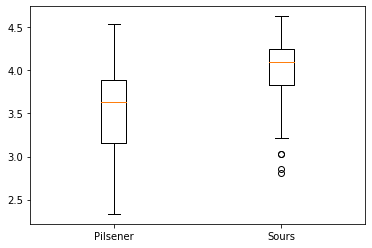

In [47]:
plt.boxplot([Pilsener_df["review_overall"],Sours_df["review_overall"]])
plt.xticks([1,2],["Pilsener","Sours"])

Text(0.5, 1.0, 'Dark Lagers')

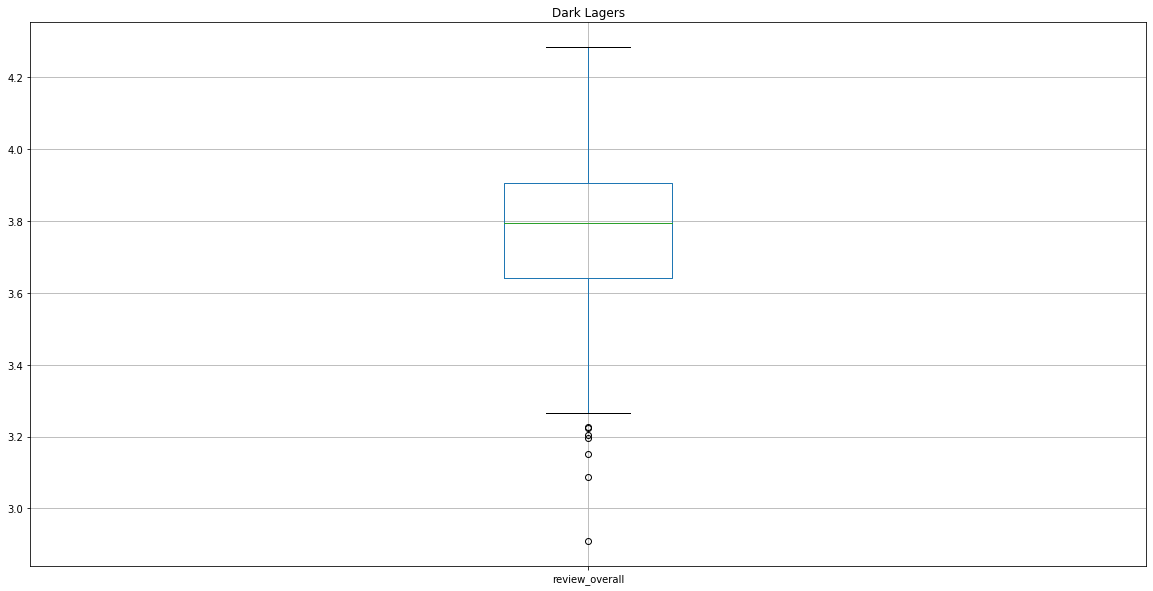

In [32]:
DarkLagers_df.boxplot("review_overall", figsize=(20,10))
plt.title("Dark Lagers")

Text(0.5, 1.0, 'Bocks')

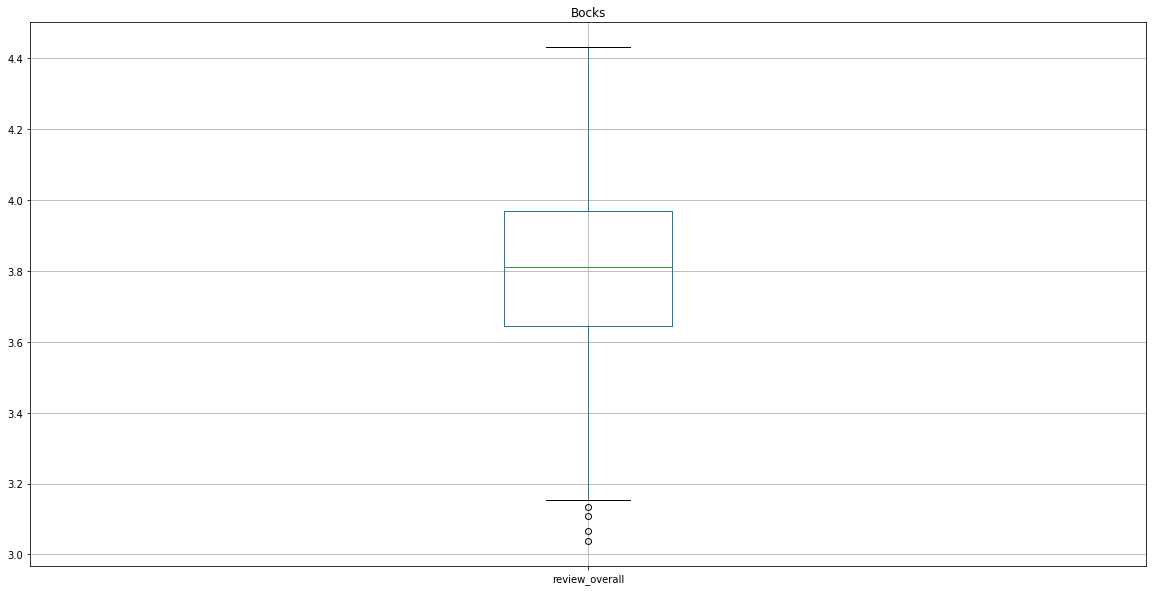

In [33]:
Bocks_df.boxplot("review_overall", figsize=(20,10))
plt.title("Bocks")

Text(0.5, 1.0, 'Brown Ales')

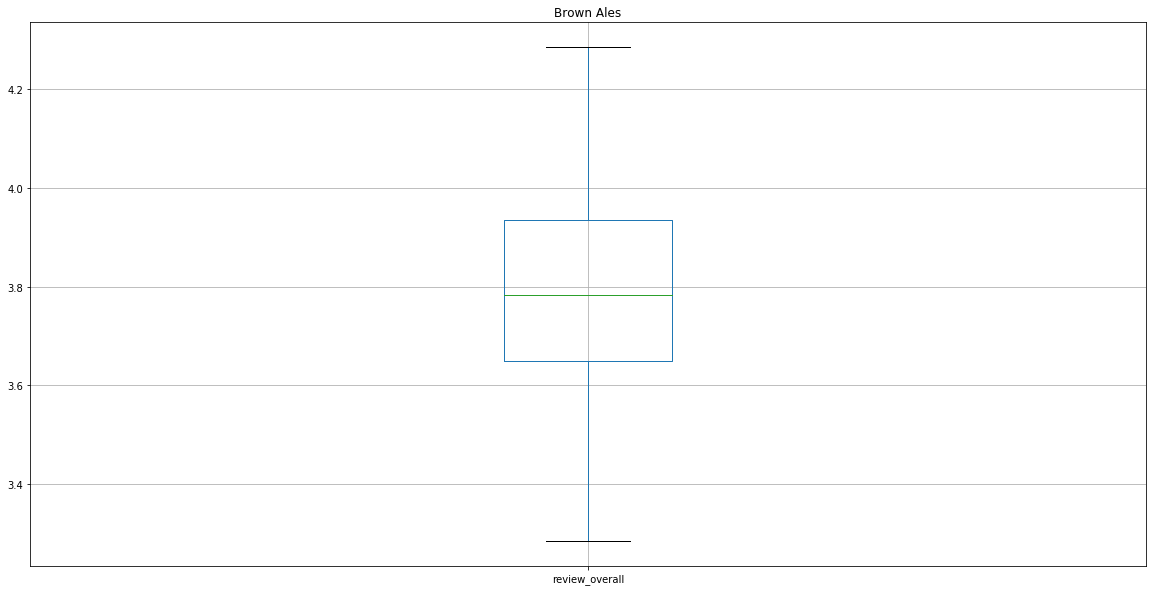

In [34]:
BrownAles_df.boxplot("review_overall", figsize=(20,10))
plt.title("Brown Ales")

Text(0.5, 1.0, 'Sours')

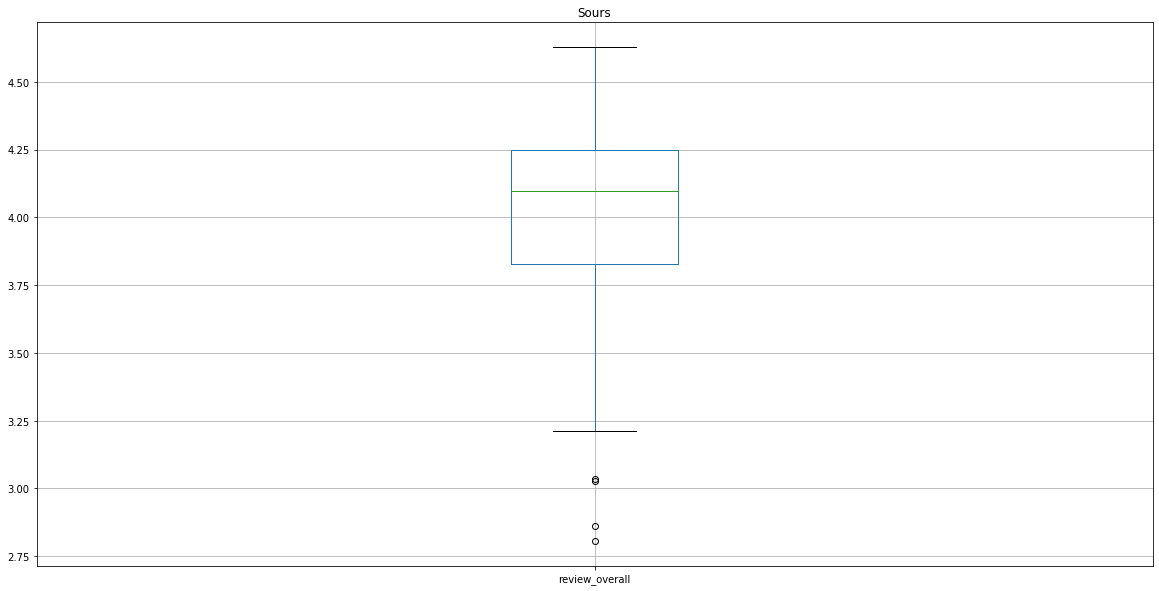

In [35]:
Sours_df.boxplot("review_overall", figsize=(20,10))
plt.title("Sours")

Text(0.5, 1.0, 'IPA')

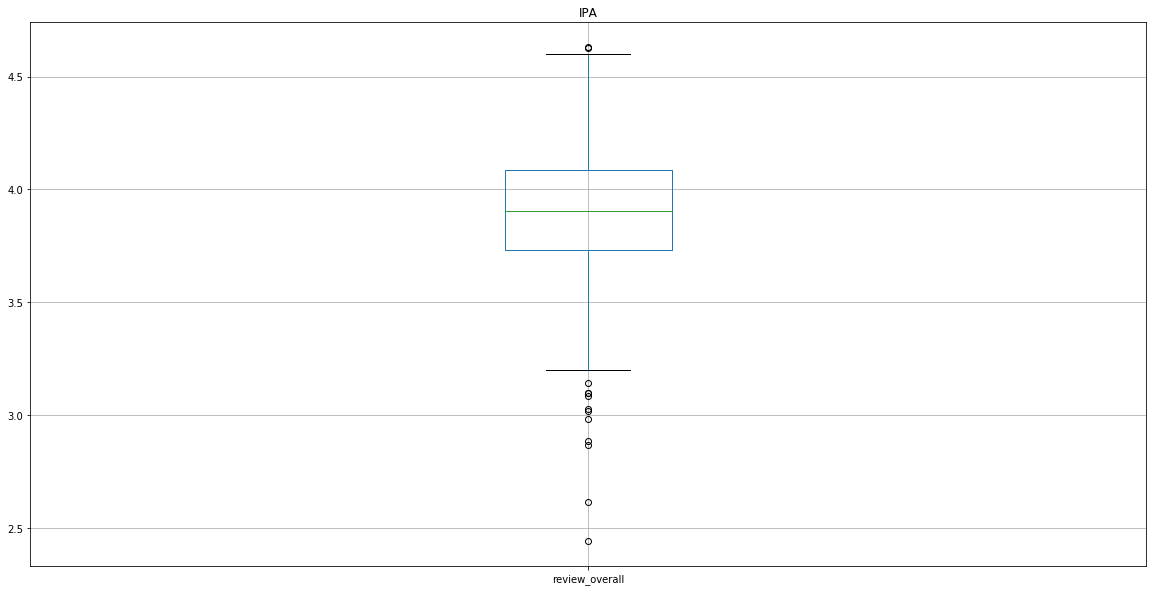

In [36]:
IPA_df.boxplot("review_overall", figsize=(20,10))
plt.title("IPA")

Text(0.5, 1.0, 'Wheat Beer')

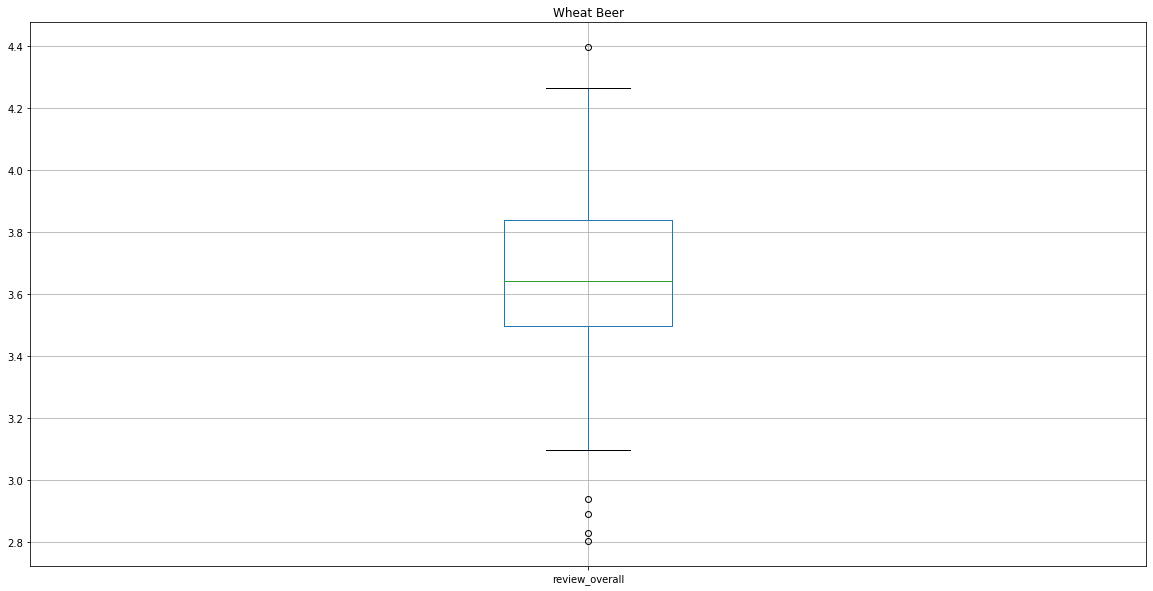

In [37]:
WheatBeer_df.boxplot("review_overall", figsize=(20,10))
plt.title("Wheat Beer")

Text(0.5, 1.0, 'Porters')

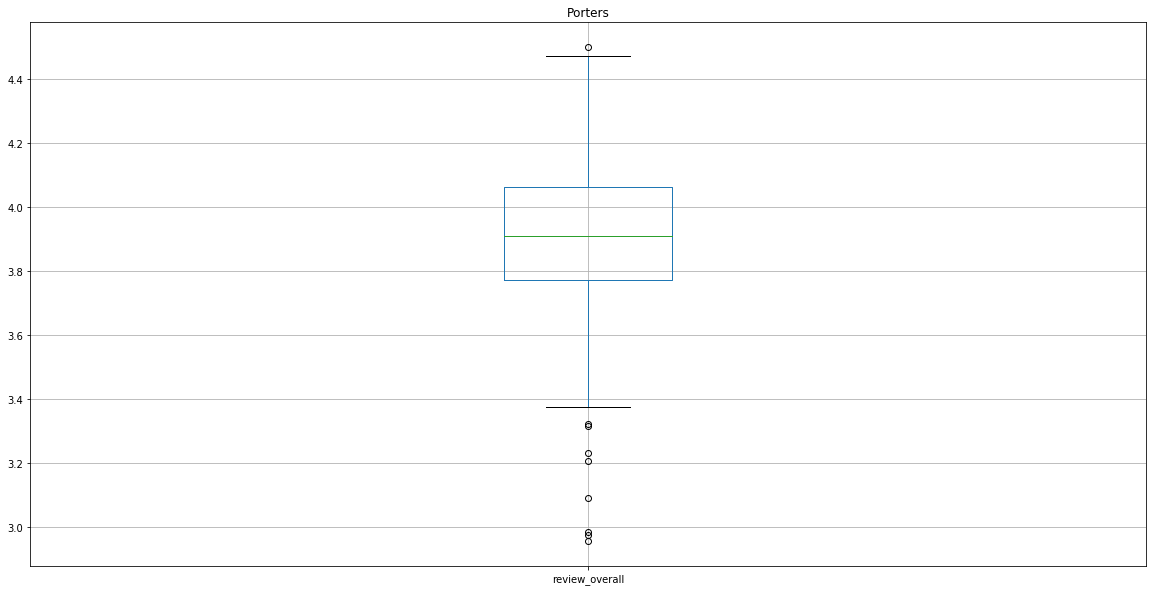

In [38]:
Porter_df.boxplot("review_overall", figsize=(20,10))
plt.title("Porters")

Text(0.5, 1.0, 'Stouts')

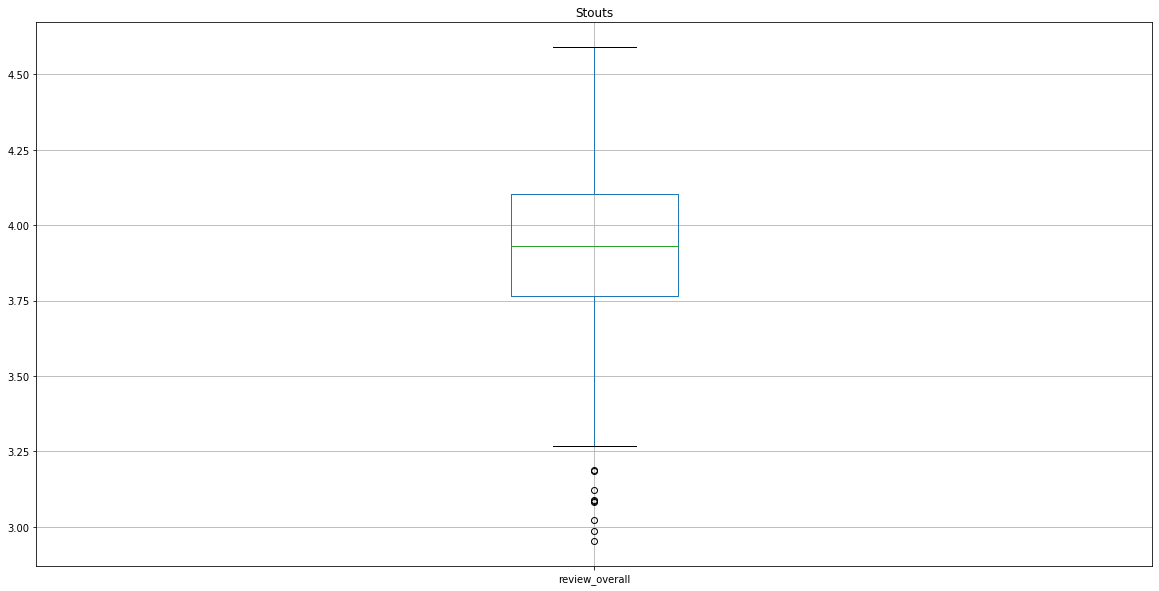

In [39]:
Stouts_df.boxplot("review_overall", figsize=(20,10))
plt.title("Stouts")

Text(0.5, 1.0, 'Pilseners')

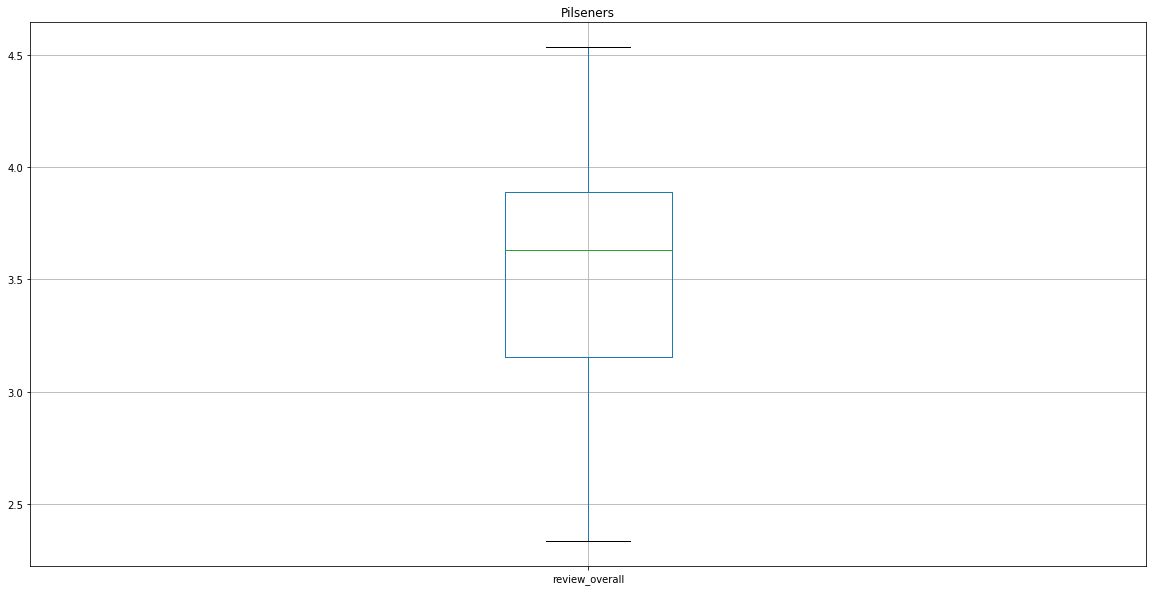

In [40]:
Pilsener_df.boxplot("review_overall", figsize=(20,10))
plt.title("Pilseners")